#Movie Industry

##Latar Belakang Dataset

Movie merupakan karya seni berupa rangkaian gambar hidup yang diputar sehingga menghasilkan sebuah ilusi gambar bergerak yang disajikan sebagai bentuk hiburan. Ilusi dari rangkaian gambar tersebut menghasilkan gerakan kontinyu berupa video. Pada mini project ini saya bertujuan untuk mengetahui EDA dan Visualization dari dataset tersebut.

## Pertanyaan Analisis



  Genre movie apakah yang paling banyak dalam movie industry?





##EDA (Exploratory Data Analysis)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/movies.csv')
df.head() 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


Variabel - variabel yang terdapat pada dataset ini adalah sebagai berikut :


**name** = judul film

**rating** = batas sensor film

**genre** = jenis sebuah film

**year** = tahun rilis film

**released** = tanggal rilis film

**score** = penilaian film di IMDb

**votes** = penilain film dari pengguna di IMDb

**director** = nama sutradara film

**writer** = nama penulis skrip film

**star** = nama aktor atau aktris pemeran utama film

**country** = negara asal film

**budget** = dana yang dikeluarkan saat pembuatan film

**gross** = dana penghasilan kotor film

**company** = nama perusahaan yang mendistribusikan film

**runtime** = durasi film






###Dimensi Data

In [8]:
df.shape

(7668, 15)

Dataset memiliki 15 kolom dan 7668 baris

### Variabel Pada Dataset

In [9]:
df.columns.values 

array(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross',
       'company', 'runtime'], dtype=object)

In [10]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [11]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


### Mengecek Missing Data

In [12]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

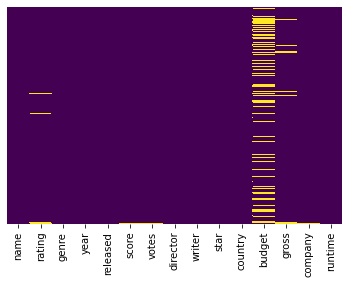

In [13]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

Kolom-kolom dengan data kosong adalah: rating, released, score, votes, writer, star, country, budget, gross, company, runtime

### Mengecek Outlier

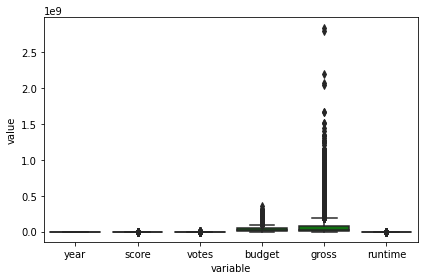

In [14]:
df1=df.select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df1))
plt.tight_layout()


Kolom numeric yang memiliki outlier adalah score, votes, budget, gross, runtime

### Melihat Korelasi Data

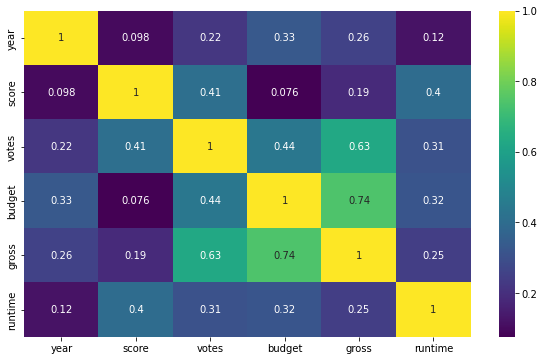

In [15]:
k = len(df1.columns)
cm = df1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

### Melihat Statistik Data

In [16]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


### Plot Distribusi Data Numerik

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

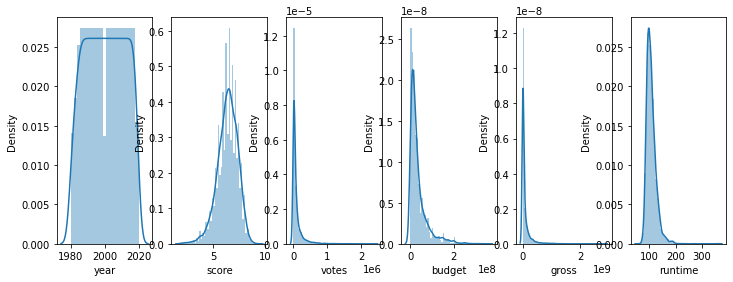

In [17]:
l = df1.columns.values
number_of_columns=len(df1.columns)
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

### Pairplot


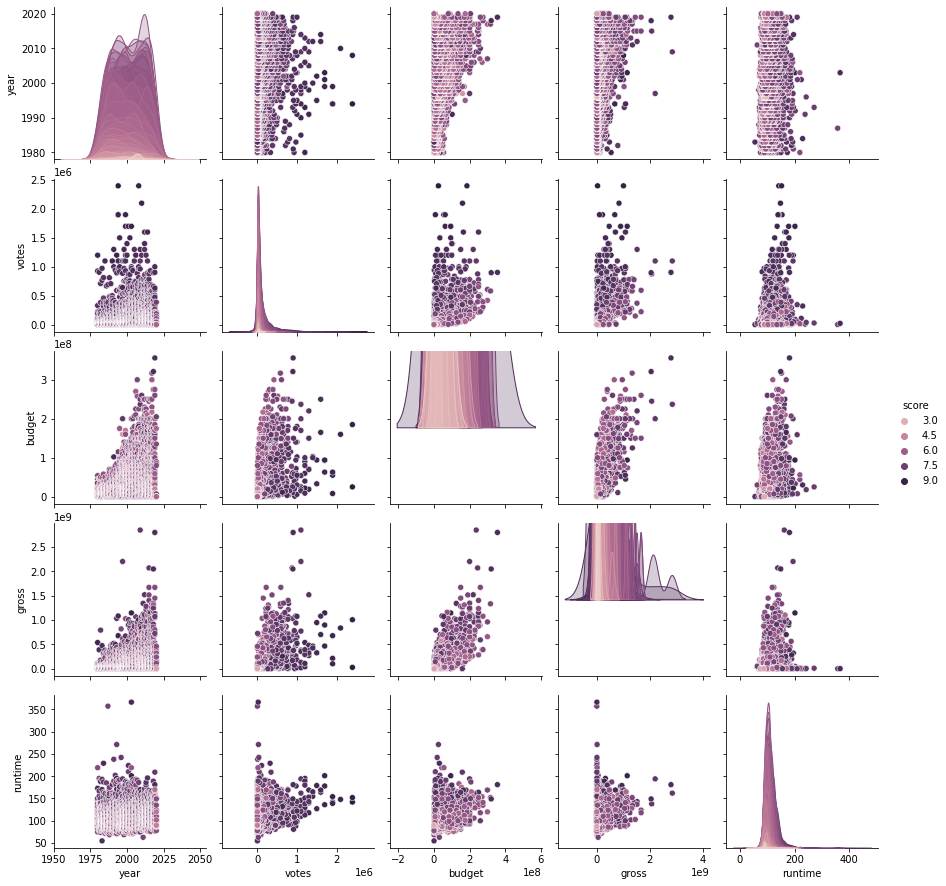

In [18]:
g = sns.pairplot(df1, hue="score")

Plot ini untuk mengetahui plot untuk masing-masing pasangan data numerik

## Data Preparation

In [20]:
df['genre'].value_counts()

Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Romance        10
Sci-Fi         10
Western         3
Musical         2
History         1
Music           1
Sport           1
Name: genre, dtype: int64

In [21]:
values = df['genre'].value_counts()[:19].tolist()
labels = df['genre'].value_counts()[:19].index.tolist()

## Data Visualization

In [22]:
#Import Modul PloltLy Express
import plotly.express as px

In [23]:
import plotly.graph_objects as go


fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()


  Genre movie yang paling banyak dalam movie industry adalah genre comedy.
